In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
import statsmodels.api as sm

In [3]:
# load datasets for two subjects, Math and Portuguese
mat = pd.read_csv("sample_data/student-mat.csv", sep=';')
por = pd.read_csv("sample_data/student-por.csv", sep=';')

In [7]:
# merge datasets
df = pd.concat([mat,por])
print(df)

    school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0       GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1       GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2       GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3       GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4       GP   F   16       U     GT3       T  ...     2       5        4   6  10  10
..     ...  ..  ...     ...     ...     ...  ...   ...     ...      ...  ..  ..  ..
644     MS   F   19       R     GT3       T  ...     2       5        4  10  11  10
645     MS   F   18       U     LE3       T  ...     1       1        4  15  15  16
646     MS   F   18       U     GT3       T  ...     1       5        6  11  12   9
647     MS   M   17       U     LE3       T  ...     4       2        6  10  10  10
648     MS   M   18       R     LE3       T  ...     4       5        4  10 

In [5]:
# rename column labels
df.columns = ['school','sex','age','address','family_size','parents_status','mother_education','father_education',
           'mother_job','father_job','reason','guardian','commute_time','study_time','failures','school_support',
          'family_support','paid_classes','activities','nursery','desire_higher_edu','internet','romantic','family_quality',
          'free_time','go_out','weekday_alcohol_usage','weekend_alcohol_usage','health','absences','period1_score','period2_score','final_score']

In [15]:
# convert final_score to categorical variable # Good:15~20 Fair:10~14 Poor:0~9
df['final_grade'] = 'na'
df.loc[(df.final_score >= 15) & (df.final_score <= 20), 'final_grade'] = 'good' 
df.loc[(df.final_score >= 10) & (df.final_score <= 14), 'final_grade'] = 'fair' 
df.loc[(df.final_score >= 0) & (df.final_score <= 9), 'final_grade'] = 'poor' 
df.head(5)

AttributeError: ignored

In [8]:
# look for missing values
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
# Final Grade Countplot
plt.figure(figsize=(8,6))
sns.countplot(df.final_grade, order=["poor","fair","good"], palette='Set1')
plt.title('Final Grade - Number of Students',fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Number of Student', fontsize=16)

AttributeError: ignored

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Correlation Heatmap')

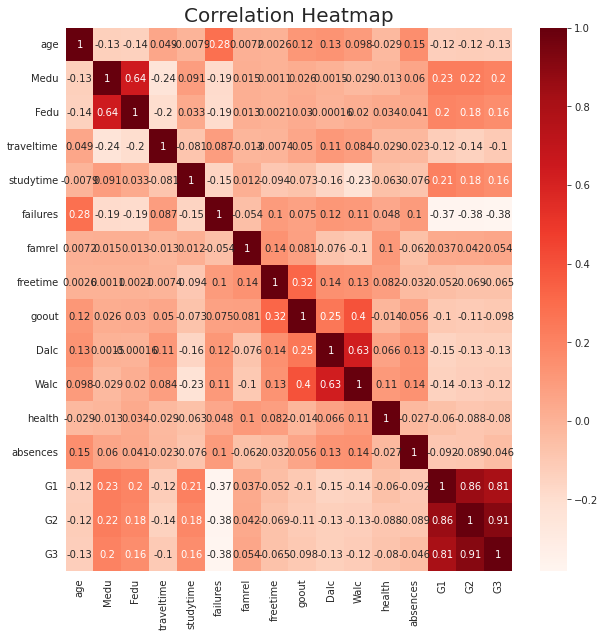

In [10]:
# see correlation between variables through a correlation heatmap
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="Reds")
plt.title('Correlation Heatmap', fontsize=20)

In [11]:
# romantic status
# how students in a romantic relationship vs. those not in a relationship perform
perc = (lambda col: col/col.sum())
index = ['poor','fair','good']
romance_tab1 = pd.crosstab(index=df.final_grade, columns=df.romantic)
romance_tab = np.log(romance_tab1)
romance_perc = romance_tab.apply(perc).reindex(index)

AttributeError: ignored

In [12]:
plt.figure()
romance_perc.plot.bar(colormap="PiYG_r", fontsize=16, figsize=(8,8))
plt.title('Final Grade By Romantic Status', fontsize=20)
plt.ylabel('Percentage of Logarithm Student Counts ', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)
plt.show()

NameError: ignored

<Figure size 432x288 with 0 Axes>

In [13]:
# going out with friends (numeric: from 1 - very low to 5 - very high)
plt.figure(figsize=(6,10))
sns.boxplot(x='go_out', y='final_score', data=df, palette='hot')
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Final Score', fontsize=16)
plt.xlabel('Frequency of Going Out', fontsize=16)

ValueError: ignored

<Figure size 432x720 with 0 Axes>

In [14]:
out_tab = pd.crosstab(index=df.final_grade, columns=df.go_out)
out_perc = out_tab.apply(perc).reindex(index)

out_perc.plot.bar(colormap="mako_r", fontsize=16, figsize=(14,6))
plt.title('Final Grade By Frequency of Going Out', fontsize=20)
plt.ylabel('Percentage of Student', fontsize=16)
plt.xlabel('Final Grade', fontsize=16)

AttributeError: ignored

In [ ]:
# the frequency of going out with friends has a significant correlation with students' final performance
# chi-square test result -- significant!
out_table = sm.stats.Table(out_tab)
out_rslt = out_table.test_nominal_association()
out_rslt.pvalue

4.365198328282194e-05

Text(0.5, 0, 'Age')

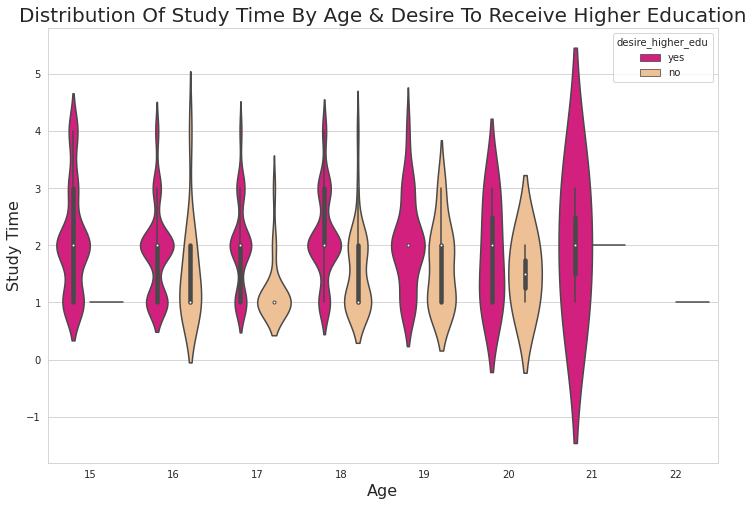

In [ ]:
# how desire to go to college influence student final performance?
# Desire for higher education and study time by age 
plt.figure(figsize=(12,8))
sns.violinplot(x='age', y='study_time', hue='desire_higher_edu', data=df, palette="Accent_r", ylim=(1,6))
plt.title('Distribution Of Study Time By Age & Desire To Receive Higher Education', fontsize=20)
plt.ylabel('Study Time', fontsize=16)
plt.xlabel('Age', fontsize=16)

In [ ]:
higher_tab = pd.crosstab(index=df.final_grade, columns=df.desire_higher_edu)
higher_perc = higher_tab.apply(perc).reindex(index)

Text(0, 0.5, 'Percentage of Student')

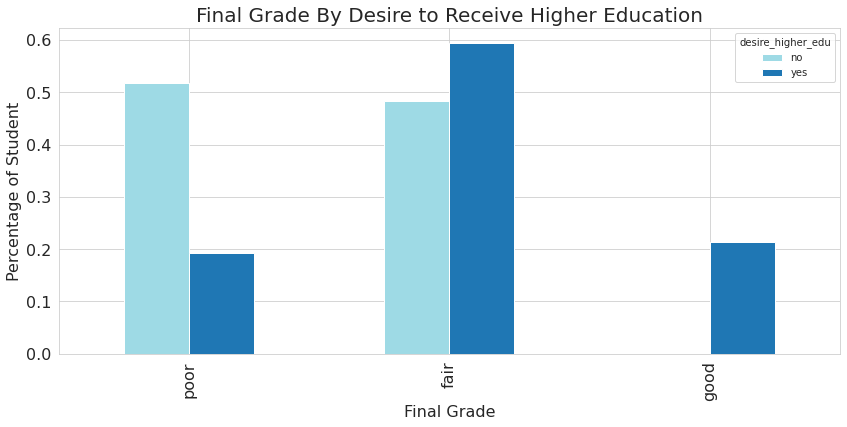

In [ ]:
higher_perc.plot.bar(colormap="tab20_r", figsize=(14,6), fontsize=16)
plt.title('Final Grade By Desire to Receive Higher Education', fontsize=20)
plt.xlabel('Final Grade', fontsize=16)
plt.ylabel('Percentage of Student', fontsize=16)

In [ ]:
# the desire of going to college has a significant correlation with students' final performance
# chi-square test result -- significant!
import statsmodels.api as sm
higher_table = sm.stats.Table(higher_tab)
higher_rslt = higher_table.test_nominal_association()
higher_rslt.pvalue

2.2470914018413168e-13

In [ ]:
# Prepare Dataset for Modelling
# create dataframe dfd for classification
dfd = df.copy()
dfd = dfd.drop([ 'final_score'], axis=1)

In [ ]:
# label encode final_grade
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dfd.final_grade = le.fit_transform(dfd.final_grade)

In [ ]:
# dataset train_test_split
from sklearn.model_selection import train_test_split
X = dfd.drop('final_grade',axis=1)
y = dfd.final_grade
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
# get dummy varibles 
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [ ]:
# see total number of features
len(list(X_train))
len(list(X_test))

58

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(multi_class='multinomial', solver='newton-cg',fit_intercept=True)

In [ ]:
# find optimal # of features to use in the model
from sklearn.feature_selection import SelectKBest, chi2

ks=[]
for i in range(1,58):
    sk = SelectKBest(chi2, k=i)
    x_new = sk.fit_transform(X_train,y_train)
    x_new_test=sk.fit_transform(X_test,y_test)
    l = lr.fit(x_new, y_train)
    ll = l.score(x_new_test, y_test)
    ks.append(ll)  
    
ks = pd.Series(ks)
ks = ks.reindex(list(range(1,58)))
ks

1     0.863057
2     0.863057
3     0.872611
4     0.866242
5     0.866242
6     0.216561
7     0.875796
8     0.878981
9     0.869427
10    0.878981
11    0.853503
12    0.216561
13    0.216561
14    0.216561
15    0.216561
16    0.866242
17    0.372611
18    0.729299
19    0.726115
20    0.722930
21    0.735669
22    0.719745
23    0.863057
24    0.882166
25    0.856688
26    0.863057
27    0.754777
28    0.754777
29    0.757962
30    0.764331
31    0.742038
32    0.869427
33    0.853503
34    0.216561
35    0.216561
36    0.216561
37    0.216561
38    0.216561
39    0.216561
40    0.216561
41    0.216561
42    0.216561
43    0.216561
44    0.216561
45    0.216561
46    0.216561
47    0.216561
48    0.216561
49    0.840764
50    0.732484
51    0.726115
52    0.729299
53    0.729299
54    0.735669
55         NaN
56         NaN
57         NaN
dtype: float64

Text(0, 0.5, 'Prediction Accuracy')

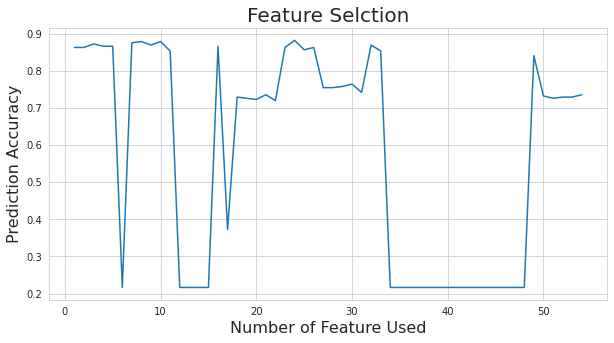

In [ ]:
plt.figure(figsize=(10,5))
ks.plot.line()
plt.title('Feature Selction', fontsize=20)
plt.xlabel('Number of Feature Used', fontsize=16)
plt.ylabel('Prediction Accuracy', fontsize=16)

In [ ]:
ks.where(ks==ks.max()).dropna()

24    0.882166
dtype: float64

In [ ]:
# final model
sk = SelectKBest(chi2, k=8)
x_new = sk.fit_transform(X_train,y_train)
x_new_test=sk.fit_transform(X_test,y_test)
lr = lr.fit(x_new, y_train)
print("Logistic Regression Model Score" , ":" , lr.score(x_new, y_train) , "," ,
      "Cross Validation Score" ,":" , lr.score(x_new_test, y_test))

Logistic Regression Model Score : 0.9 , Cross Validation Score : 0.8757961783439491


**Support Vector Classification**

In [ ]:
from sklearn.svm import SVC
svc = SVC()
s= svc.fit(X_train, y_train)
print("SVC Model Score" , ":" , s.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , s.score(X_test, y_test))

SVC Model Score : 0.8863013698630137 , Cross Validation Score : 0.8598726114649682


**Decision Tree Classification**

In [ ]:
# find the optimal # of minimum samples leaf
from sklearn.tree import DecisionTreeClassifier

msl=[]
for i in range(1,58):
    tree = DecisionTreeClassifier(min_samples_leaf=i)
    t= tree.fit(X_train, y_train)
    ts=t.score(X_test, y_test)
    msl.append(ts)
msl = pd.Series(msl)
msl.where(msl==msl.max()).dropna()

1     0.863057
15    0.863057
16    0.863057
17    0.863057
18    0.863057
19    0.863057
20    0.863057
21    0.863057
23    0.863057
24    0.863057
25    0.863057
dtype: float64

In [ ]:
# final model
tree = DecisionTreeClassifier(min_samples_leaf=17)
t= tree.fit(X_train, y_train)
print("Decision Tree Model Score" , ":" , t.score(X_train, y_train) , "," , 
      "Cross Validation Score" ,":" , t.score(X_test, y_test))

Decision Tree Model Score : 0.9 , Cross Validation Score : 0.8630573248407644


In [ ]:
# find a good # of estimators
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier()
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

46    0.875796
dtype: float64

In [ ]:
# find a good # of min_samples_leaf
from sklearn.ensemble import RandomForestClassifier

ne=[]
for i in range(1,58):
    forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=i)
    f = forest.fit(X_train, y_train)
    fs = f.score(X_test, y_test)
    ne.append(fs)
ne = pd.Series(ne)
ne.where(ne==ne.max()).dropna()

4    0.863057
dtype: float64

In [ ]:
# final model
forest = RandomForestClassifier(n_estimators=36, min_samples_leaf=2)
f = forest.fit(X_train, y_train)
print("Random Forest Model Score" , ":" , f.score(X_train, y_train) , "," ,
      "Cross Validation Score" ,":" , f.score(X_test, y_test))

Random Forest Model Score : 0.9808219178082191 , Cross Validation Score : 0.856687898089172


**model selection**


> Logistic Regression Model Score : 0.887671232877 , Cross Validation Score : 0.8757961783439491\
> SVC Model Score : 0.8808219178082192 , Cross Validation Score : 0.8598726114649682\
> Decisioin Tree Model Score : 0.8945205479452055 , Cross Validation Score : 0.8630573248407644\
> Raondom Forest Model Score : 0.9863013698630136 , Cross Validation Score : 0.856687898089172 


